# A: sample distribution and sampling distribution

## Um pesquisador está avaliando a qualidade visual de diferentes gráficos gerados por uma meta-heurística. Os valores da métrica de qualidade seguem uma distribuição normal com média de 0.7 e desvio padrão de 0.1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

# Criando uma POPULAÇÃO ARTIFICIAL com distribuição Gaussiana
media = 0.7
desvio_p = 0.1
populacao = np.random.normal(loc=media, scale=desvio_p, size=100000)

In [ ]:
# Função para plotar histograma
def plot_hist(data, titulo, cor):
    count, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.6, color=cor, edgecolor='black')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    pdf = norm.pdf(x, np.mean(data), np.std(data))
    plt.plot(x, pdf, 'k', linewidth=2)
    plt.title(titulo)
    plt.xlabel('Valor')
    plt.ylabel('Densidade')

In [ ]:
#Tirando uma única AMOSTRA (sample distribution) com tamnaho 100
amostra = np.random.choice(populacao, size=100, replace=False)

In [ ]:
# Criando uma DISTRIBUIÇÃO AMOSTRAL da MÉDIA (sampling distribution)
n_amostras = 1000
tamanho_amostra = 100
medias_amostras = []

for _ in range(n_amostras):
    amostra_temp = np.random.choice(populacao, size=tamanho_amostra, replace=False)
    medias_amostras.append(np.mean(amostra_temp))

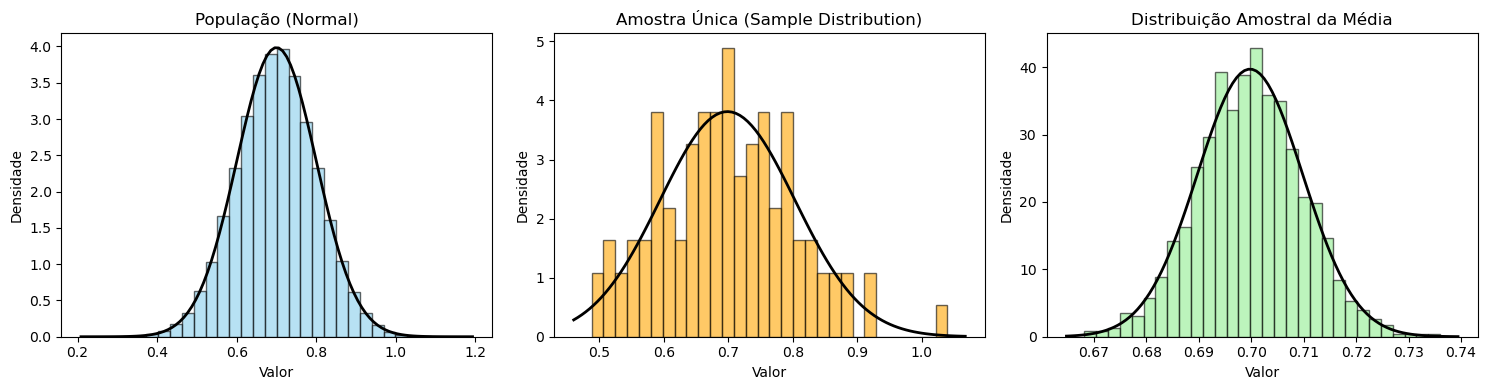

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plot_hist(populacao, "População (Normal)", 'skyblue')

plt.subplot(1, 3, 2)
plot_hist(amostra, "Amostra Única (Sample Distribution)", 'orange')

plt.subplot(1, 3, 3)
plot_hist(medias_amostras, "Distribuição Amostral da Média", 'lightgreen')

plt.tight_layout()
plt.show()


Qual é a probabilidade de que a média da qualidade visual em uma amostra de 100 resultados aleatórios seja maior que 0.71?

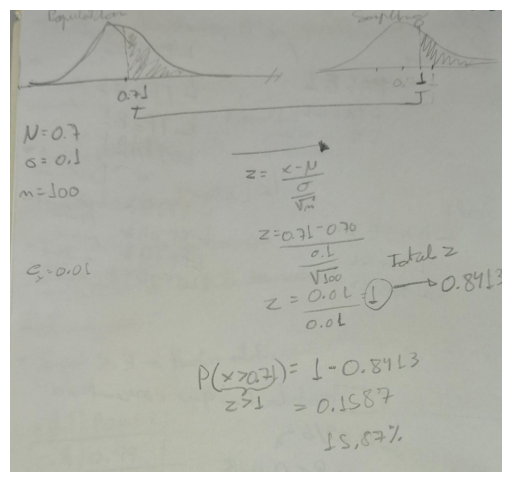

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Carregar e exibir a imagem
img = mpimg.imread('avaliação de probabilidade.jpeg')  # Caminho ajustado para o mesmo diretório
plt.figure(figsize=(8, 6))  # Ajusta o tamanho do gráfico (opcional)
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()

In [ ]:
mu = 0.7
sigma = 0.1
n = 100
erro_padrao = sigma / np.sqrt(n)

x_barra = 0.71
z = (x_barra - mu) / erro_padrao
p = 1 - norm.cdf(z)

print(f"Z = {z:.2f}")
print(f"P(𝑋̄ > 0.7) = {p:.4f}")


Z = 1.00
P(𝑋̄ > 0.7) = 0.1587


# B: TLC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Geração da população Gama
np.random.seed(42)  # Garante reprodutibilidade dos resultados
# Geração de uma população seguindo a distribuição Gama
population = np.random.gamma(shape=2, scale=2, size=100000)


# 2. Visualização da distribuição real

plt.figure(figsize=(8, 5))
sns.histplot(population, bins=50, kde=True, color="skyblue", label="População (Gama)")
plt.title("Distribuição da População (Gama)")
plt.legend()
plt.show()


# 3. Função que simula o TLC para diferentes tamanhos de amostra

def visualize_clt(sample_sizes, n_samples=1000):
    """
    Gera n_samples amostras para cada tamanho em sample_sizes,
    calcula a média de cada amostra e plota a distribuição dessas médias.
    """
    plt.figure(figsize=(15, 10))

    for i, n in enumerate(sample_sizes, 1):
        # Geração das médias de n_samples amostras com tamanho n
        sample_means = [np.mean(np.random.choice(population, size=n, replace=False)) for _ in range(n_samples)]

        # Subplot correspondente a esse tamanho de amostra
        plt.subplot(2, len(sample_sizes)//2, i)
        sns.histplot(sample_means, bins=30, kde=True, color="orange")

        # Parâmetros da normal teórica com mesma média e desvio das amostras
        mu, sigma = np.mean(sample_means), np.std(sample_means)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        
        # Curva da normal teórica sobreposta ao histograma
        plt.plot(x, norm.pdf(x, loc=mu, scale=sigma) * n_samples, label="Normal PDF", color="red")

        plt.title(f"Tamanho da Amostra = {n}")
        plt.legend()

    plt.tight_layout()
    plt.show()

sample_sizes = [10, 30, 50, 150]  # Tamanhos de amostra a serem testados
visualize_clt(sample_sizes)       # Executa e plota os resultados

: 

# C: p-value

In [ ]:
import math

# seguindo a formula da distribuição binomial
# Calcula a probabilidade de k sucessos em n tentativas
def binomial_probability(k, n, p):    
    comb = math.comb(n, k)
    return comb * (p ** k) * ((1 - p) ** (n - k))

#  Calcula o p-valor considerando eventos tão raros ou mais extremos
def calcular_p_value(n, p, observado):
    
    # Calcula a probabilidade do evento observado
    prob_observado = binomial_probability(observado, n, p)
    limite = prob_observado 
    print(f"Probabilidade de {observado} caras e {n-observado} coroas: {limite:.5f}")
    
    # Calcular todas as probabilidades possíveis
    k_values = list(range(n + 1))
    probs = []
    
    print(" Probabilidades para cada número de caras:")
    for k in k_values:
        prob = binomial_probability(k, n, p)
        probs.append(prob)
        print(f"  {k} caras: probabilidade = {prob:.5f}")   
    

    # mostrar todas as probabilidades, com destaque na barra observada
    cores_fig1 = []
    for k in k_values:
        if k == observado:
            cores_fig1.append('orange')  # Destacar o número observado
        else:
            cores_fig1.append('lightblue')
    
    plt.figure(figsize=(8,5))
    plt.bar(k_values, probs, color=cores_fig1, edgecolor='black')
    plt.title('Probabilidade de cada número de caras (4 caras em destaque)', fontsize=14)
    plt.xlabel('Número de caras')
    plt.ylabel('Probabilidade')
    plt.xticks(k_values)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # Pega todos os resultados que têm probabilidade menor ou igual à do evento observado.
    eventos_extremos = []
    for k, prob in zip(k_values, probs):
        if prob <= limite:
            eventos_extremos.append((k, prob))
    
    # imprime os eventos que foram considerados para calcular o p-valor 
    print("\n Eventos tão raros ou mais raros que o observado <=", limite)
    for k, prob in eventos_extremos:
        print(f"  {k} caras: probabilidade = {prob:.5f}")
    
    # mostra eventos tão raros ou mais raros
    cores_fig2 = []
    for prob in probs:
        if prob <= limite:
            cores_fig2.append('red')
        else:
            cores_fig2.append('lightblue')
    
    plt.figure(figsize=(8,5))
    plt.bar(k_values, probs, color=cores_fig2, edgecolor='black')
    plt.title('Eventos tão raros ou mais raros que o observado (barras vermelhas)', fontsize=14)
    plt.xlabel('Número de caras')
    plt.ylabel('Probabilidade')
    plt.xticks(k_values)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # Somando as probabilidades raras para o p-valor
    print("\n Somando as probabilidades raras:")
    p_value = 0
    for i, (k, prob) in enumerate(eventos_extremos):
        if i == 0:
            print(f"  P({k} caras) = {prob:.5f}")
        else:
            print(f"+ P({k} caras) = {prob:.5f}")
        p_value += prob
    print("-" * 30)
    
    # p-valor final
    print(f"P-valor final = {p_value:.5f}")


# parametro e chamada da função:
n_lancamentos = 5       # 5 jogadas
p_cara = 0.5            # moeda justa
caras_observadas = 4    # 4 caras observadas
calcular_p_value(n_lancamentos, p_cara, caras_observadas)
